<a href="https://colab.research.google.com/github/akhunzakp/PCVK_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **D. Praktikum**

**# D1. Operasi Citra Sederhana**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-4035496954.py:15: RuntimeWarning: overflow encountered in scalar add
  brightness_image [y,x,c] = np.clip(original [y,x,c] + brightness, 0, 255,)


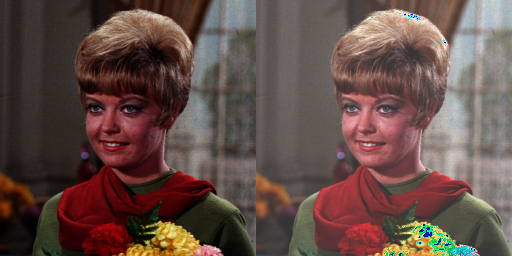

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
   for x in range(original.shape[1]):
      for c in range(original.shape[2]):
          brightness_image [y,x,c] = np.clip(original [y,x,c] + brightness, 0, 255,)
#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs (original, beta-brightness)

final_frame = cv2.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **Tugas Praktikum D1**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

 Mengimplementasikan Inverse Citra 
-----------------------------------


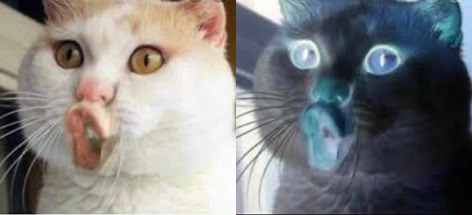

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengimplementasikan Inverse Citra ')
print('-----------------------------------')

image_path = '/content/drive/MyDrive/PCVK/Images/kitten01.jpg'
original_inverse = cv2.imread(image_path)

if original_inverse is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:
    # Implementasi Inverse Citra
    # Formula inverse untuk gambar 8-bit adalah 255 - nilai_piksel
    inverted_image = 255 - original_inverse

    # Gabungkan gambar asli dan gambar inverse untuk ditampilkan
    combined_inverse_frame = cv2.hconcat((original_inverse, inverted_image))

    # Tampilkan hasil
    cv2_imshow(combined_inverse_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra 
------------------------------------------


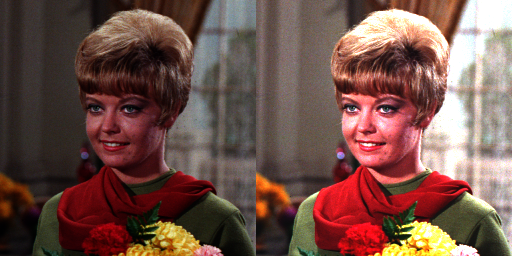

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah kontras dan tingkat kecerahan citra ')
print('------------------------------------------')

image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original_contrast = cv2.imread(image_path)

if original_contrast is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:
    # Implementasi Transformasi Kontras
    # Formula: new_pixel = alpha * old_pixel + beta
    # alpha > 1 meningkatkan kontras
    # 0 < alpha < 1 mengurangi kontras
    # beta mengatur kecerahan (positif untuk lebih terang, negatif untuk lebih gelap)

    alpha = 2
    beta = 10

    contrast_image = cv2.convertScaleAbs(original_contrast, alpha=alpha, beta=beta)

    combined_contrast_frame = cv2.hconcat((original_contrast, contrast_image))

    # Tampilkan hasil
    cv2_imshow(combined_contrast_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut	:


 Mengubah tingkat kecerahan citra dengan Tranformasi Log
------------------------------------------
Masukkan nilai kecerahan : 20


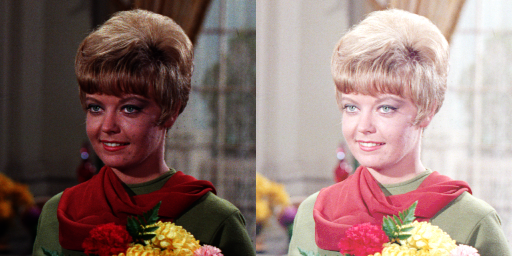

In [41]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math

print(' Mengubah tingkat kecerahan citra dengan Tranformasi Log')
print('------------------------------------------')

image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original_log = cv2.imread(image_path)

if original_log is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:
    try:
        brightness = int(input('Masukkan nilai kecerahan : '))
    except ValueError:
        print('Error, not a number')
        brightness = 0 #default


    c = 255 / math.log(1 + 255)  # Menghitung konstanta c based on max possible pixel value

    log_image = np.zeros(original_log.shape, dtype=np.uint8)

    for y in range(original_log.shape[0]):
        for x in range(original_log.shape[1]):
            for c_channel in range(original_log.shape[2]):
                log_image[y, x, c_channel] = np.clip(c * math.log(1 + original_log[y, x, c_channel]) + brightness, 0, 255)


    # Gabungkan gambar asli dan gambar logaritma untuk ditampilkan
    combined_log_frame = cv2.hconcat((original_log, log_image))

    # Tampilkan hasil
    cv2_imshow(combined_log_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

 A. Averaging 
--------------


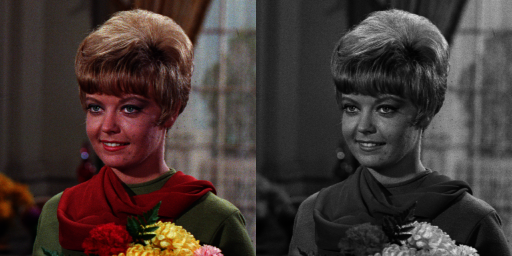

In [50]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' A. Averaging ')
print('--------------')

image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original_gray_avg = cv2.imread(image_path)

if original_gray_avg is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:

    if len(original_gray_avg.shape) == 3:
        gray_image_avg = np.zeros((original_gray_avg.shape[0], original_gray_avg.shape[1]), dtype=np.uint8)

        for y in range(original_gray_avg.shape[0]):
            for x in range(original_gray_avg.shape[1]):
                b, g, r = original_gray_avg[y, x]
                gray_value = (int(b) + int(g) + int(r)) // 3
                gray_image_avg[y, x] = gray_value

        gray_image_avg_bgr = cv2.cvtColor(gray_image_avg, cv2.COLOR_GRAY2BGR)

        # Gabungkan gambar asli dan gambar grayscale untuk ditampilkan
        combined_gray_avg_frame = cv2.hconcat((original_gray_avg, gray_image_avg_bgr))

        # Tampilkan hasil
        cv2_imshow(combined_gray_avg_frame)
    else:
        print("Gambar sudah dalam format grayscale atau memiliki jumlah channel yang tidak terduga.")

 B. Lightness 
--------------


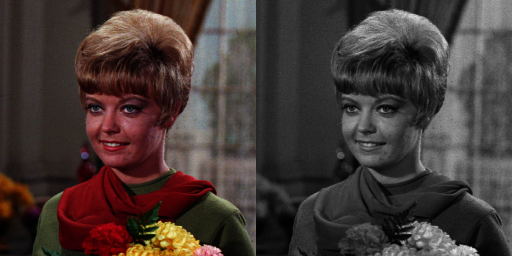

In [51]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' B. Lightness ')
print('--------------')

image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original_gray_lightness = cv2.imread(image_path)

if original_gray_lightness is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:

    if len(original_gray_lightness.shape) == 3:
        gray_image_lightness = np.zeros((original_gray_lightness.shape[0], original_gray_lightness.shape[1]), dtype=np.uint8)

        for y in range(original_gray_lightness.shape[0]):
            for x in range(original_gray_lightness.shape[1]):
                b, g, r = original_gray_lightness[y, x]
                max_val = max(int(b), int(g), int(r))
                min_val = min(int(b), int(g), int(r))
                gray_value = (max_val + min_val) // 2
                gray_image_lightness[y, x] = gray_value

        gray_image_lightness_bgr = cv2.cvtColor(gray_image_lightness, cv2.COLOR_GRAY2BGR)

        # Gabungkan gambar asli dan grayscale lightness
        combined_lightness_frame = cv2.hconcat((original_gray_lightness, gray_image_lightness_bgr))

        # Tampilkan hasil
        cv2_imshow(combined_lightness_frame)
    else:
        print("Gambar sudah dalam format grayscale atau memiliki jumlah channel yang tidak terduga.")


 C. Luminance 
--------------


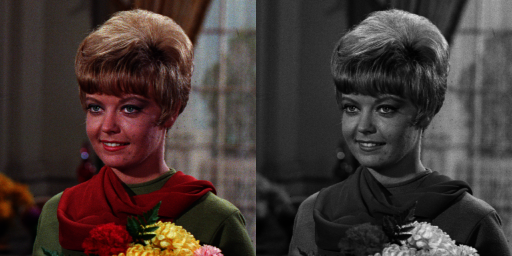

In [52]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' C. Luminance ')
print('--------------')

image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original_gray_luminance = cv2.imread(image_path)

if original_gray_luminance is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:

    if len(original_gray_luminance.shape) == 3:
        gray_image_luminance = np.zeros((original_gray_luminance.shape[0], original_gray_luminance.shape[1]), dtype=np.uint8)

        for y in range(original_gray_luminance.shape[0]):
            for x in range(original_gray_luminance.shape[1]):
                b, g, r = original_gray_luminance[y, x]
                # Rumus Luminance
                gray_value = int(0.114 * b + 0.587 * g + 0.299 * r)
                gray_image_luminance[y, x] = gray_value

        gray_image_luminance_bgr = cv2.cvtColor(gray_image_luminance, cv2.COLOR_GRAY2BGR)

        # Gabungkan gambar asli dan grayscale luminance
        combined_luminance_frame = cv2.hconcat((original_gray_luminance, gray_image_luminance_bgr))

        # Tampilkan hasil
        cv2_imshow(combined_luminance_frame)
    else:
        print("Gambar sudah dalam format grayscale atau memiliki jumlah channel yang tidak terduga.")


5.	Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut	:


 Menampilkan Warna Biru dan Mengubah Lainnya menjadi Grayscale 
-------------------------------------------------------------


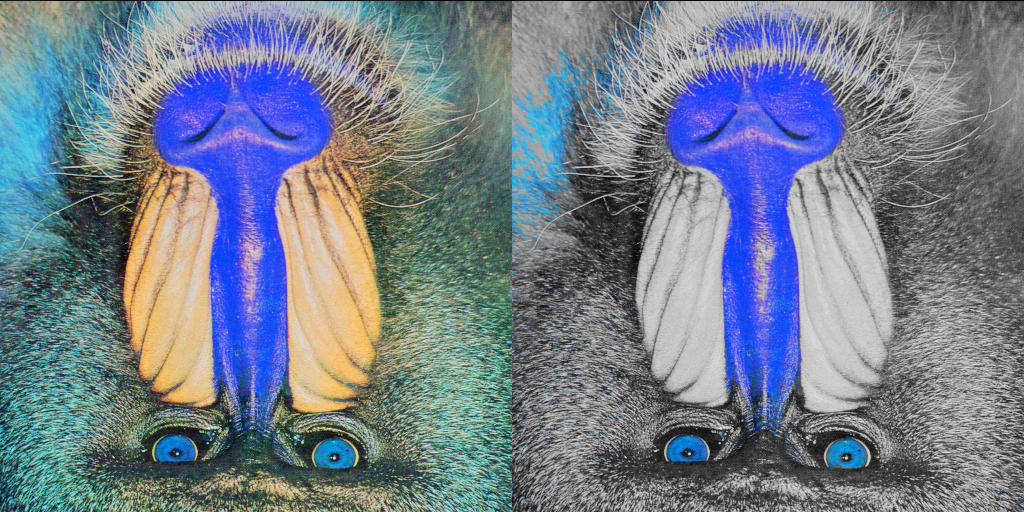

In [58]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Menampilkan Warna Biru dan Mengubah Lainnya menjadi Grayscale ')
print('-------------------------------------------------------------')

image_path = '/content/drive/MyDrive/PCVK/Images/mandrill2.tiff'
original_color_gray = cv2.imread(image_path)

if original_color_gray is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:
    # Buat image kosong untuk hasil
    result_image = np.zeros_like(original_color_gray)

    # Iterasi tiap pixel
    for y in range(original_color_gray.shape[0]):
        for x in range(original_color_gray.shape[1]):
            b, g, r = original_color_gray[y, x]

            # Konversi ke int agar tidak overflow
            b, g, r = int(b), int(g), int(r)

            # Threshold warna biru
            blue_threshold = 50
            rg_threshold = 30

            if b > blue_threshold and b > g + rg_threshold and b > r + rg_threshold:
                # Warna biru → tetap berwarna
                result_image[y, x] = [b, g, r]
            else:
                # Selain biru → ubah ke grayscale (luminance)
                gray_value = int(0.114 * b + 0.587 * g + 0.299 * r)
                result_image[y, x] = [gray_value, gray_value, gray_value]

    # Gabungkan gambar asli dan hasil
    combined_color_gray_frame = cv2.hconcat((original_color_gray, result_image))

    # Tampilkan hasil
    cv2_imshow(combined_color_gray_frame)


# **Tugas Praktikum D2**

**# D2. Operasi Operasi Aritmatika dan Logika**

1. Buat Gamma Correction sesuai dengan petunjuk berikut

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma : 3


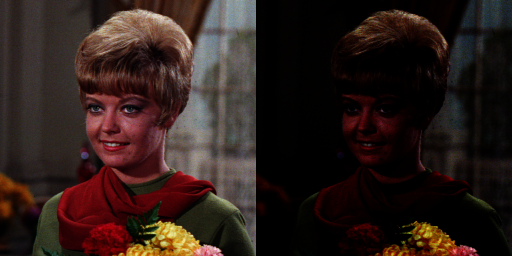

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Gamma Correction pada citra ')
print('----------------------------------')

image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original_img = cv2.imread(image_path)

if original_img is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:
    try:
        gamma = float(input('Masukkan nilai Gamma : '))
    except ValueError:
        print('Error: input harus berupa angka ')
        gamma = 1.0  # default

    # Normalisasi nilai gamma
    invGamma = 1.0 / gamma

    # Buat lookup table untuk percepat perhitungan
    table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(256)]).astype("uint8")

    # Terapkan gamma correction
    gamma_corrected = cv2.LUT(original_img, table)

    # Gabungkan gambar asli dan hasil
    combined_gamma = cv2.hconcat([original_img, gamma_corrected])

    # Tampilkan hasil
    cv2_imshow(combined_gamma)


2. Buat Simulasi Image Depth

 Gamma Correction pada citra Grayscale 
----------------------------------
Masukkan nilai Gamma: 3


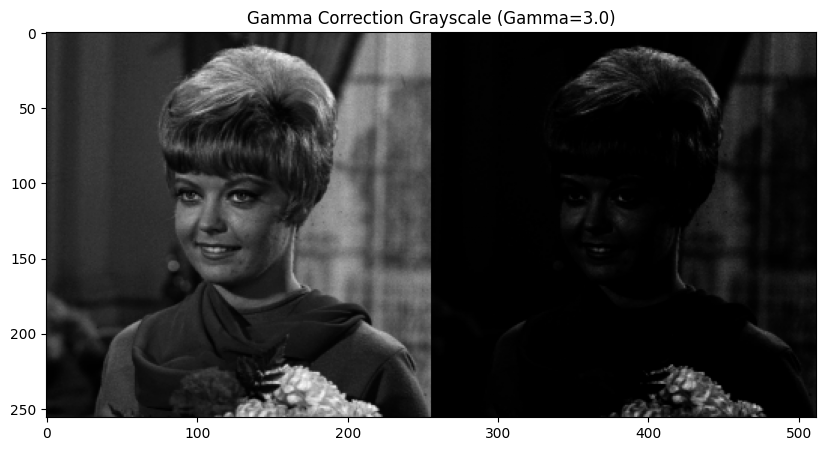

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(' Gamma Correction pada citra Grayscale ')
print('----------------------------------')

# Path gambar
image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original_img = cv2.imread(image_path)

if original_img is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:
    # Ubah ke grayscale
    gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

    try:
        gamma = float(input('Masukkan nilai Gamma: '))
    except ValueError:
        print('Error: input harus berupa angka (misalnya 0.5 atau 2.0)')
        gamma = 1.0  # default

    # Buat lookup table untuk gamma correction
    table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(256)]).astype("uint8")
    gamma_corrected = cv2.LUT(gray_img, table)

    # Gabungkan gambar asli & hasil gamma
    combined = cv2.hconcat([gray_img, gamma_corrected])

    # Tampilkan dengan matplotlib
    plt.figure(figsize=(10,5))
    plt.imshow(combined, cmap="gray")
    plt.axis("on")
    plt.title(f"Gamma Correction Grayscale (Gamma={gamma})")
    plt.show()


3. Buat modul Average Denoising

Jumlah citra noisy ditemukan: 0


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipython-input-227162667.py:34: RuntimeWarning: invalid value encountered in cast
  avg_img = np.mean(selected_imgs, axis=0).astype(np.uint8)


TypeError: Invalid shape () for image data

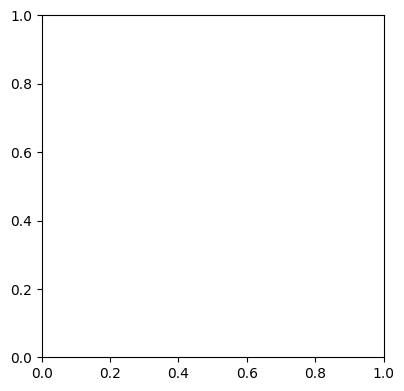

In [15]:
import cv2 as cv
import numpy as np
import glob
import matplotlib.pyplot as plt

# Path citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
original_gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Membaca semua citra noisy
cv_img = []
for img in sorted(glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg')):
    n = cv.imread(img, cv.IMREAD_GRAYSCALE)
    cv_img.append(n)

print(f"Jumlah citra noisy ditemukan: {len(cv_img)}")

# Fungsi untuk menghitung PSNR
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

# Daftar jumlah citra untuk diuji
averages = [10, 20, 40, 80, 100]

plt.figure(figsize=(15,10))

for i, n_avg in enumerate(averages, 1):
    # Ambil n citra pertama
    selected_imgs = cv_img[:n_avg]
    avg_img = np.mean(selected_imgs, axis=0).astype(np.uint8)

    # Hitung PSNR
    psnr_value = psnr(original_gray, avg_img)

    # Plot hasil
    plt.subplot(2, 3, i)
    plt.imshow(avg_img, cmap="gray")
    plt.title(f"{n_avg} citra\nPSNR: {psnr_value:.2f} dB")
    plt.axis("off")

plt.suptitle("Average Denoising dengan berbagai jumlah citra")
plt.tight_layout()
plt.show()
